## WeatherPy
------
### Objective
Build a series of scatter plots to showcase the following relationships:
* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

### Method
* Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude
* Perform a weather check on each of the cities using a series of successive API calls
* Include a print log of each city as it's being processed with the city number, city name, and requested URL
* Save both a CSV of all data retrieved and png images for each scatter plot

### Analysis
* From the latitude vs temperature plot you can see that it is hotter near the equator. Also noteworthy--the temperatures are much cooler in the positive latitudes due to the season. Winter has just finished north of the equator (positive latitudes) and summer has just ended south of the equator (negative latitudes). 


* There does not seem to be a relationship between latitude and humidity, cloudiness, or windspeed.


* While this is a representative model of weather in cities across the world, it is only a snapshot of one day's weather. A yearly or even longer historical view could offer more insight. 

In [1]:
# Dependencies
import random
import pandas as pd
import matplotlib.pyplot as plt
import openweathermapy.core as owm
import seaborn as sns

from citipy import citipy
from urllib.error import HTTPError
from urllib.parse import quote_plus
from datetime import datetime
from config import owkey

In [2]:
'''Generate cities list'''

#make lists for lat and lng
lat = []
lng = []

#get random #s for lat and lng and append to their lists
for i in range(2500):
    #use randrange + random rather than uniform b/c the full range of 
    # lattitudes and longitudes should be covered
    lat.append(random.randrange(-90, 90) + random.random())
    lng.append(random.randrange(-180, 180) + random.random())

#make a df
df = pd.DataFrame({'Latitude': lat, 'Longitude': lng, 'Place': ''})
    
#find the nearest city using citipy and add to the df
for index, row in df.iterrows():
    city = citipy.nearest_city(row['Latitude'], row['Longitude'])
    df.at[index,"Place"] = (f"{city.city_name},{city.country_code}")

#drop any duplicate cities
df = df.drop_duplicates(['Place'], keep='first')

#reset the index
df = df.reset_index(drop=True)

In [4]:
'''Perform API calls'''

#**NOTE: replace "YOUROWNAPIKEY" with your own api key in the URL. I left mine out because we were 
# told in class not to put on github**

#make a setting dict
settings = {"units": "imperial", "appid": owkey}

#make a list containing the info needed
keys = ['main.temp_max', 'main.humidity', 'clouds.all', 'wind.speed', 'name', 'sys.country']

#make the "done" print statement
done = f"""{'-'*30}
Data Retrieval Complete
{'-'*30}"""

#find the current weather for each place and add data to the df
#**NOTE: I didn't include date because it's not used for anything. If I were to include it,
# 'dt' goes in the keys dictionary and would follow the additions below
for index, row in df.iterrows():
    try:
        place = row['Place']
        data = owm.get_current(place, **settings)
        info = data(*keys)
        df.at[index,'Max Temperature (F)'] = (info[0])
        df.at[index,'Humidity %'] = (int(info[1]))
        df.at[index,'Cloudiness %'] = (int(info[2]))
        df.at[index,'Wind Speed (mph)'] = (info[3])
        df.at[index,'City'] = (info[4])
        df.at[index,'Country'] = (info[5])
        print(f"Processing Record {index} | {place}")
        print(f"{owm.BASE_URL}weather?units=Imperial&APPID=YOUROWNAPIKEY&q={quote_plus(place)}")
    except(HTTPError):
        print(f"Processing Record {index} | {place}")
        print(f"Missing field/result for {row['Place']}. Skipping.")
print(done)

Processing Record 0 | albany,au
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=albany%2Cau
Processing Record 1 | hobart,au
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=hobart%2Cau
Processing Record 2 | pandamatenga,bw
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=pandamatenga%2Cbw
Processing Record 3 | east london,za
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=east+london%2Cza
Processing Record 4 | inhambane,mz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=inhambane%2Cmz
Processing Record 5 | busselton,au
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=busselton%2Cau
Processing Record 6 | new norfolk,au
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=new+norfolk%2Cau
Processing Record 7 | thompson,ca
http://api.openweathermap.

Processing Record 66 | mar del plata,ar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=mar+del+plata%2Car
Processing Record 67 | mys shmidta,ru
Missing field/result for mys shmidta,ru. Skipping.
Processing Record 68 | tiarei,pf
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=tiarei%2Cpf
Processing Record 69 | tarudant,ma
Missing field/result for tarudant,ma. Skipping.
Processing Record 70 | zhigansk,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=zhigansk%2Cru
Processing Record 71 | jamestown,sh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=jamestown%2Csh
Processing Record 72 | muscat,om
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=muscat%2Com
Processing Record 73 | bluff,nz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=bluff%2Cnz
Processing Record 74 | colomi,bo

Processing Record 133 | placido de castro,br
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=placido+de+castro%2Cbr
Processing Record 134 | mindif,cm
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=mindif%2Ccm
Processing Record 135 | grand gaube,mu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=grand+gaube%2Cmu
Processing Record 136 | hofn,is
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=hofn%2Cis
Processing Record 137 | middelburg,za
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=middelburg%2Cza
Processing Record 138 | lac du bonnet,ca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=lac+du+bonnet%2Cca
Processing Record 139 | villanueva de la serena,es
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=villanueva+de+la+serena%2Ces
Proces

Processing Record 197 | vaitupu,wf
Missing field/result for vaitupu,wf. Skipping.
Processing Record 198 | yarkovo,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=yarkovo%2Cru
Processing Record 199 | ribeira grande,pt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=ribeira+grande%2Cpt
Processing Record 200 | aswan,eg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=aswan%2Ceg
Processing Record 201 | bubaque,gw
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=bubaque%2Cgw
Processing Record 202 | cockburn town,tc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=cockburn+town%2Ctc
Processing Record 203 | bequimao,br
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=bequimao%2Cbr
Processing Record 204 | buala,sb
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=Y

Processing Record 264 | port hedland,au
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=port+hedland%2Cau
Processing Record 265 | san ramon de la nueva oran,ar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=san+ramon+de+la+nueva+oran%2Car
Processing Record 266 | luganville,vu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=luganville%2Cvu
Processing Record 267 | kaohsiung,tw
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=kaohsiung%2Ctw
Processing Record 268 | artyk,ru
Missing field/result for artyk,ru. Skipping.
Processing Record 269 | gombe,ng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=gombe%2Cng
Processing Record 270 | prince rupert,ca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=prince+rupert%2Cca
Processing Record 271 | sao joao da barra,br
http://api.openweat

Processing Record 328 | san quintin,mx
Missing field/result for san quintin,mx. Skipping.
Processing Record 329 | vao,nc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=vao%2Cnc
Processing Record 330 | soyo,ao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=soyo%2Cao
Processing Record 331 | falealupo,ws
Missing field/result for falealupo,ws. Skipping.
Processing Record 332 | palabuhanratu,id
Missing field/result for palabuhanratu,id. Skipping.
Processing Record 333 | bang len,th
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=bang+len%2Cth
Processing Record 334 | kargasok,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=kargasok%2Cru
Processing Record 335 | shanghai,cn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=shanghai%2Ccn
Processing Record 336 | xiongzhou,cn
http://api.openweathermap.org/data/2.5/we

Processing Record 392 | namatanai,pg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=namatanai%2Cpg
Processing Record 393 | kadaya,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=kadaya%2Cru
Processing Record 394 | peterhead,gb
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=peterhead%2Cgb
Processing Record 395 | riberalta,bo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=riberalta%2Cbo
Processing Record 396 | mayskiy,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=mayskiy%2Cru
Processing Record 397 | tilichiki,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=tilichiki%2Cru
Processing Record 398 | skibbereen,ie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=skibbereen%2Cie
Processing Record 399 | roquetas de mar,es
http://api.op

Processing Record 457 | hafizabad,pk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=hafizabad%2Cpk
Processing Record 458 | salalah,om
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=salalah%2Com
Processing Record 459 | faanui,pf
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=faanui%2Cpf
Processing Record 460 | tahlequah,us
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=tahlequah%2Cus
Processing Record 461 | viloco,bo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=viloco%2Cbo
Processing Record 462 | xining,cn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=xining%2Ccn
Processing Record 463 | sobolevo,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=sobolevo%2Cru
Processing Record 464 | saint-augustin,ca
http://api.openweathermap.org/

Processing Record 521 | turiacu,br
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=turiacu%2Cbr
Processing Record 522 | najran,sa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=najran%2Csa
Processing Record 523 | sao manuel,br
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=sao+manuel%2Cbr
Processing Record 524 | paramonga,pe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=paramonga%2Cpe
Processing Record 525 | chapleau,ca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=chapleau%2Cca
Processing Record 526 | constitucion,mx
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=constitucion%2Cmx
Processing Record 527 | isla mujeres,mx
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=isla+mujeres%2Cmx
Processing Record 528 | mehriz,ir
http://api.o

Processing Record 584 | mezen,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=mezen%2Cru
Processing Record 585 | oistins,bb
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=oistins%2Cbb
Processing Record 586 | sotouboua,tg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=sotouboua%2Ctg
Processing Record 587 | mount gambier,au
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=mount+gambier%2Cau
Processing Record 588 | bela,pk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=bela%2Cpk
Processing Record 589 | asfi,ma
Missing field/result for asfi,ma. Skipping.
Processing Record 590 | nemuro,jp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=nemuro%2Cjp
Processing Record 591 | maridi,sd
Missing field/result for maridi,sd. Skipping.
Processing Record 592 | harlingen,nl
http://api.

Processing Record 650 | pontiac,us
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=pontiac%2Cus
Processing Record 651 | erzin,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=erzin%2Cru
Processing Record 652 | karratha,au
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=karratha%2Cau
Processing Record 653 | general bravo,mx
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=general+bravo%2Cmx
Processing Record 654 | mujiayingzi,cn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=mujiayingzi%2Ccn
Processing Record 655 | nador,ma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=nador%2Cma
Processing Record 656 | marystown,ca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=marystown%2Cca
Processing Record 657 | gayny,ru
http://api.openweathermap

Processing Record 714 | meulaboh,id
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=meulaboh%2Cid
Processing Record 715 | puerto escondido,mx
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=puerto+escondido%2Cmx
Processing Record 716 | weyburn,ca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=weyburn%2Cca
Processing Record 717 | saint-pierre,pm
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=saint-pierre%2Cpm
Processing Record 718 | doctor pedro p. pena,py
Missing field/result for doctor pedro p. pena,py. Skipping.
Processing Record 719 | houma,us
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=houma%2Cus
Processing Record 720 | ferkessedougou,ci
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=ferkessedougou%2Cci
Processing Record 721 | tabuny,ru
http://api.openweathermap.

Processing Record 778 | kawalu,id
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=kawalu%2Cid
Processing Record 779 | saint-joseph,re
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=saint-joseph%2Cre
Processing Record 780 | camabatela,ao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=camabatela%2Cao
Processing Record 781 | wad rawah,sd
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=wad+rawah%2Csd
Processing Record 782 | imuris,mx
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=imuris%2Cmx
Processing Record 783 | bemidji,us
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=bemidji%2Cus
Processing Record 784 | kabompo,zm
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=kabompo%2Czm
Processing Record 785 | camana,pe
Missing field/result for c

Processing Record 844 | iquitos,pe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=iquitos%2Cpe
Processing Record 845 | klin,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=klin%2Cru
Processing Record 846 | winnemucca,us
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=winnemucca%2Cus
Processing Record 847 | jesup,us
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUROWNAPIKEY&q=jesup%2Cus
------------------------------
Data Retrieval Complete
------------------------------


In [5]:
#delete rows where places have no data
df = df.dropna(how='any')

#get a count
df.count()

Latitude               743
Longitude              743
Place                  743
Max Temperature (F)    743
Humidity %             743
Cloudiness %           743
Wind Speed (mph)       743
City                   743
Country                743
dtype: int64

In [6]:
#narrow it down to 500 cities
try:
    df = df.sample(n=500)
except(ValueError):
    print("There are less than 500 cities to begin with.")

In [7]:
#drop the place, lat, and lng columns
df = df.drop('Place', axis=1)

#reset the index
df = df.reset_index(drop=True)

#export to a csv
df.to_csv('weather_data.csv')

#show the df head
df.head()

,Latitude,Longitude,Max Temperature (F),Humidity %,Cloudiness %,Wind Speed (mph),City,Country
0,55.083658,119.905840,19.04,50.0,68.0,10.76,Tupik,RU
1,41.752672,-8.471769,59.00,67.0,0.0,14.99,Sande,PT
2,61.883712,133.171272,20.66,75.0,88.0,6.62,Churapcha,RU
3,63.318879,-53.242472,41.00,44.0,20.0,1.12,Nuuk,GL
4,33.596669,165.606646,26.78,100.0,48.0,10.98,Severo-Kurilsk,RU


In [8]:
#make a function to make the scatter plots

def sp_maker(y_axis, dot_color, vs_title):
    
    #make the label font bigger
    sns.set(font_scale=1.5)
    
    #plot
    fig = sns.lmplot(x='Latitude', y=y_axis, data=df, fit_reg=False, 
           scatter_kws={'alpha':0.9, 'color':dot_color}, size=8, aspect=1.25)
    
    #get today's date
    date_now = datetime.now()
    today = date_now.strftime("%m/%d/%Y")
    
    #set the title
    plt.title(f"City Latitude vs. {vs_title} ({today})", fontsize=20)
    
    #save as a png
    fig.savefig(f"{vs_title}.png")
    plt.show()

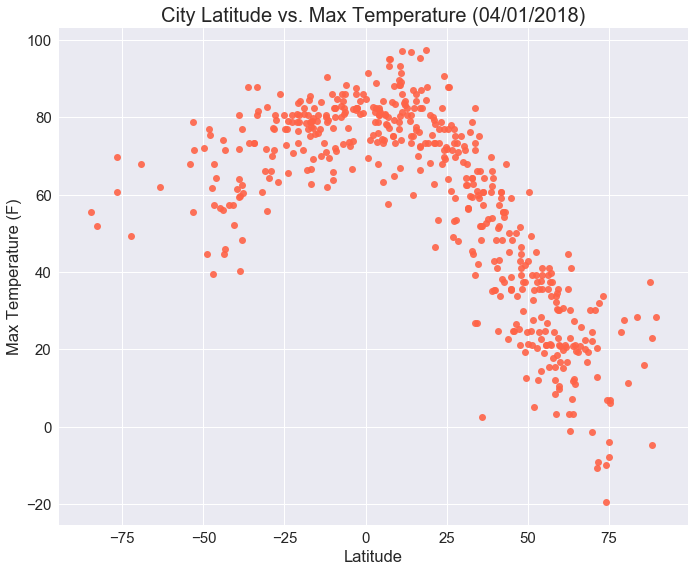

In [9]:
'''Latitude vs temperature plot'''

sp_maker('Max Temperature (F)', 'tomato', 'Max Temperature')

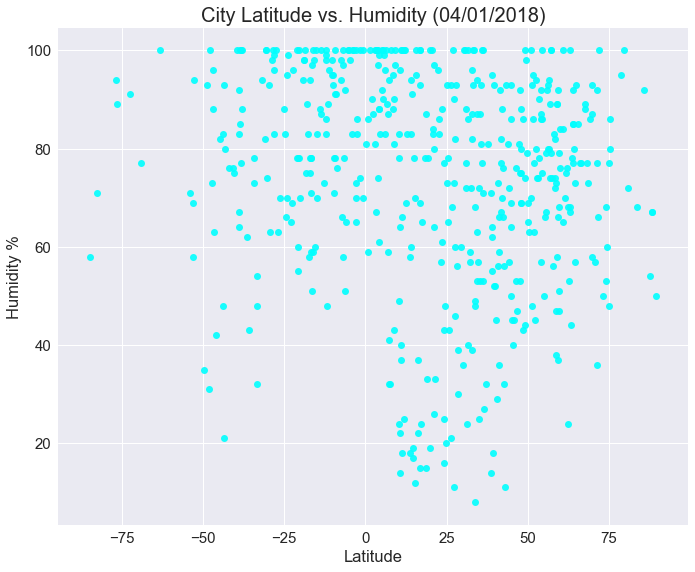

In [10]:
'''Latitude vs humidity plot'''

sp_maker('Humidity %', 'aqua', 'Humidity')

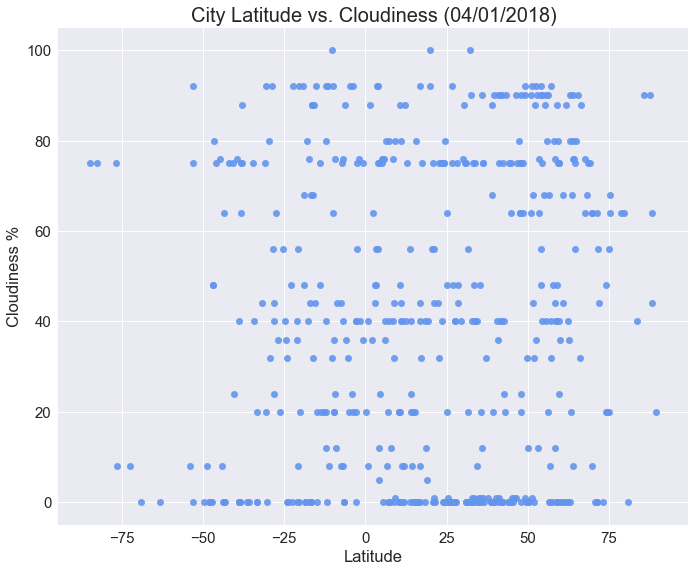

In [11]:
'''Latitude vs cloudiness plot'''

sp_maker('Cloudiness %', 'cornflowerblue', 'Cloudiness')

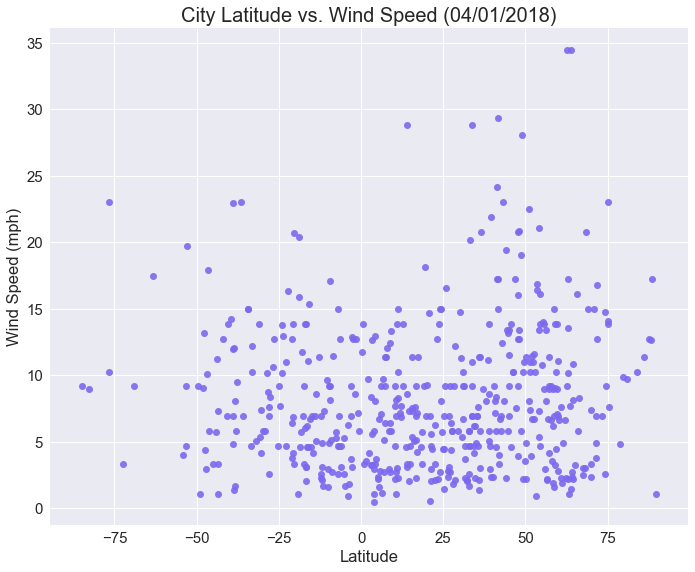

In [12]:
'''Latitude vs wind speed plot'''

sp_maker('Wind Speed (mph)', 'mediumslateblue', 'Wind Speed')